In [1]:
import pandas as pd

In [2]:
hot = pd.read_csv('top100_a.csv')
not_hot = pd.read_csv('not_hot_songs_a.csv')

In [3]:
hot['hot'] = True
not_hot['hot'] = False

In [4]:
all_songs = pd.concat([hot,not_hot], axis = 0)
all_songs.shape

(5100, 24)

In [5]:
all_songs = all_songs[all_songs['type']=='audio_features']

In [6]:
all_songs.shape

(3680, 24)

In [7]:
all_songs.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

In [8]:
all_songs.shape

(3680, 22)

In [ ]:
all_songs.reset_index(drop=True, inplace=True)

In [9]:
audio_features = ['danceability', 'energy', 
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 
       'tempo','time_signature','key', 'liveness','loudness','valence', ]

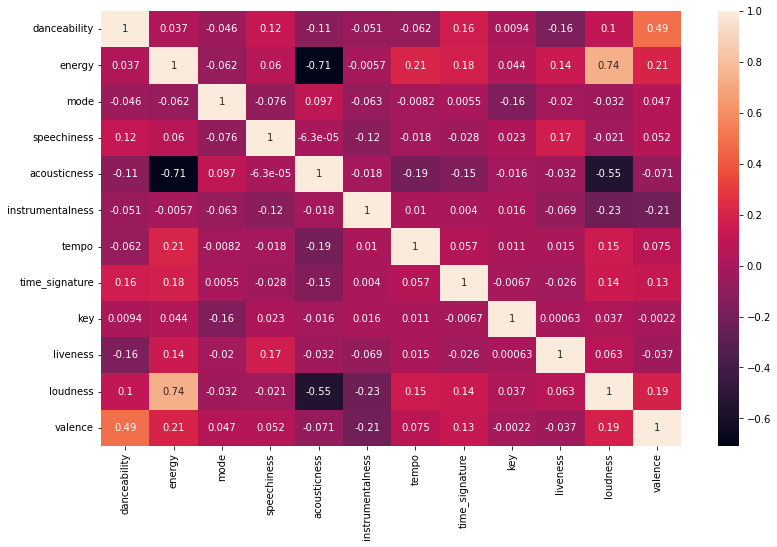

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

correlations_matrix=all_songs[audio_features].corr()

fig, ax1 = plt.subplots(1,1,figsize=(13,8))
sns.heatmap(correlations_matrix, annot=True, ax=ax1)
plt.show()

# removing energy due to high corr 

In [ ]:
fig, axs = plt.subplots(all_songs[audio_features].shape[1],figsize=(13,25))

for n,i in enumerate(audio_features):
    sns.histplot(all_songs[i], ax=axs[n]).set(title=i)

#plt.show()


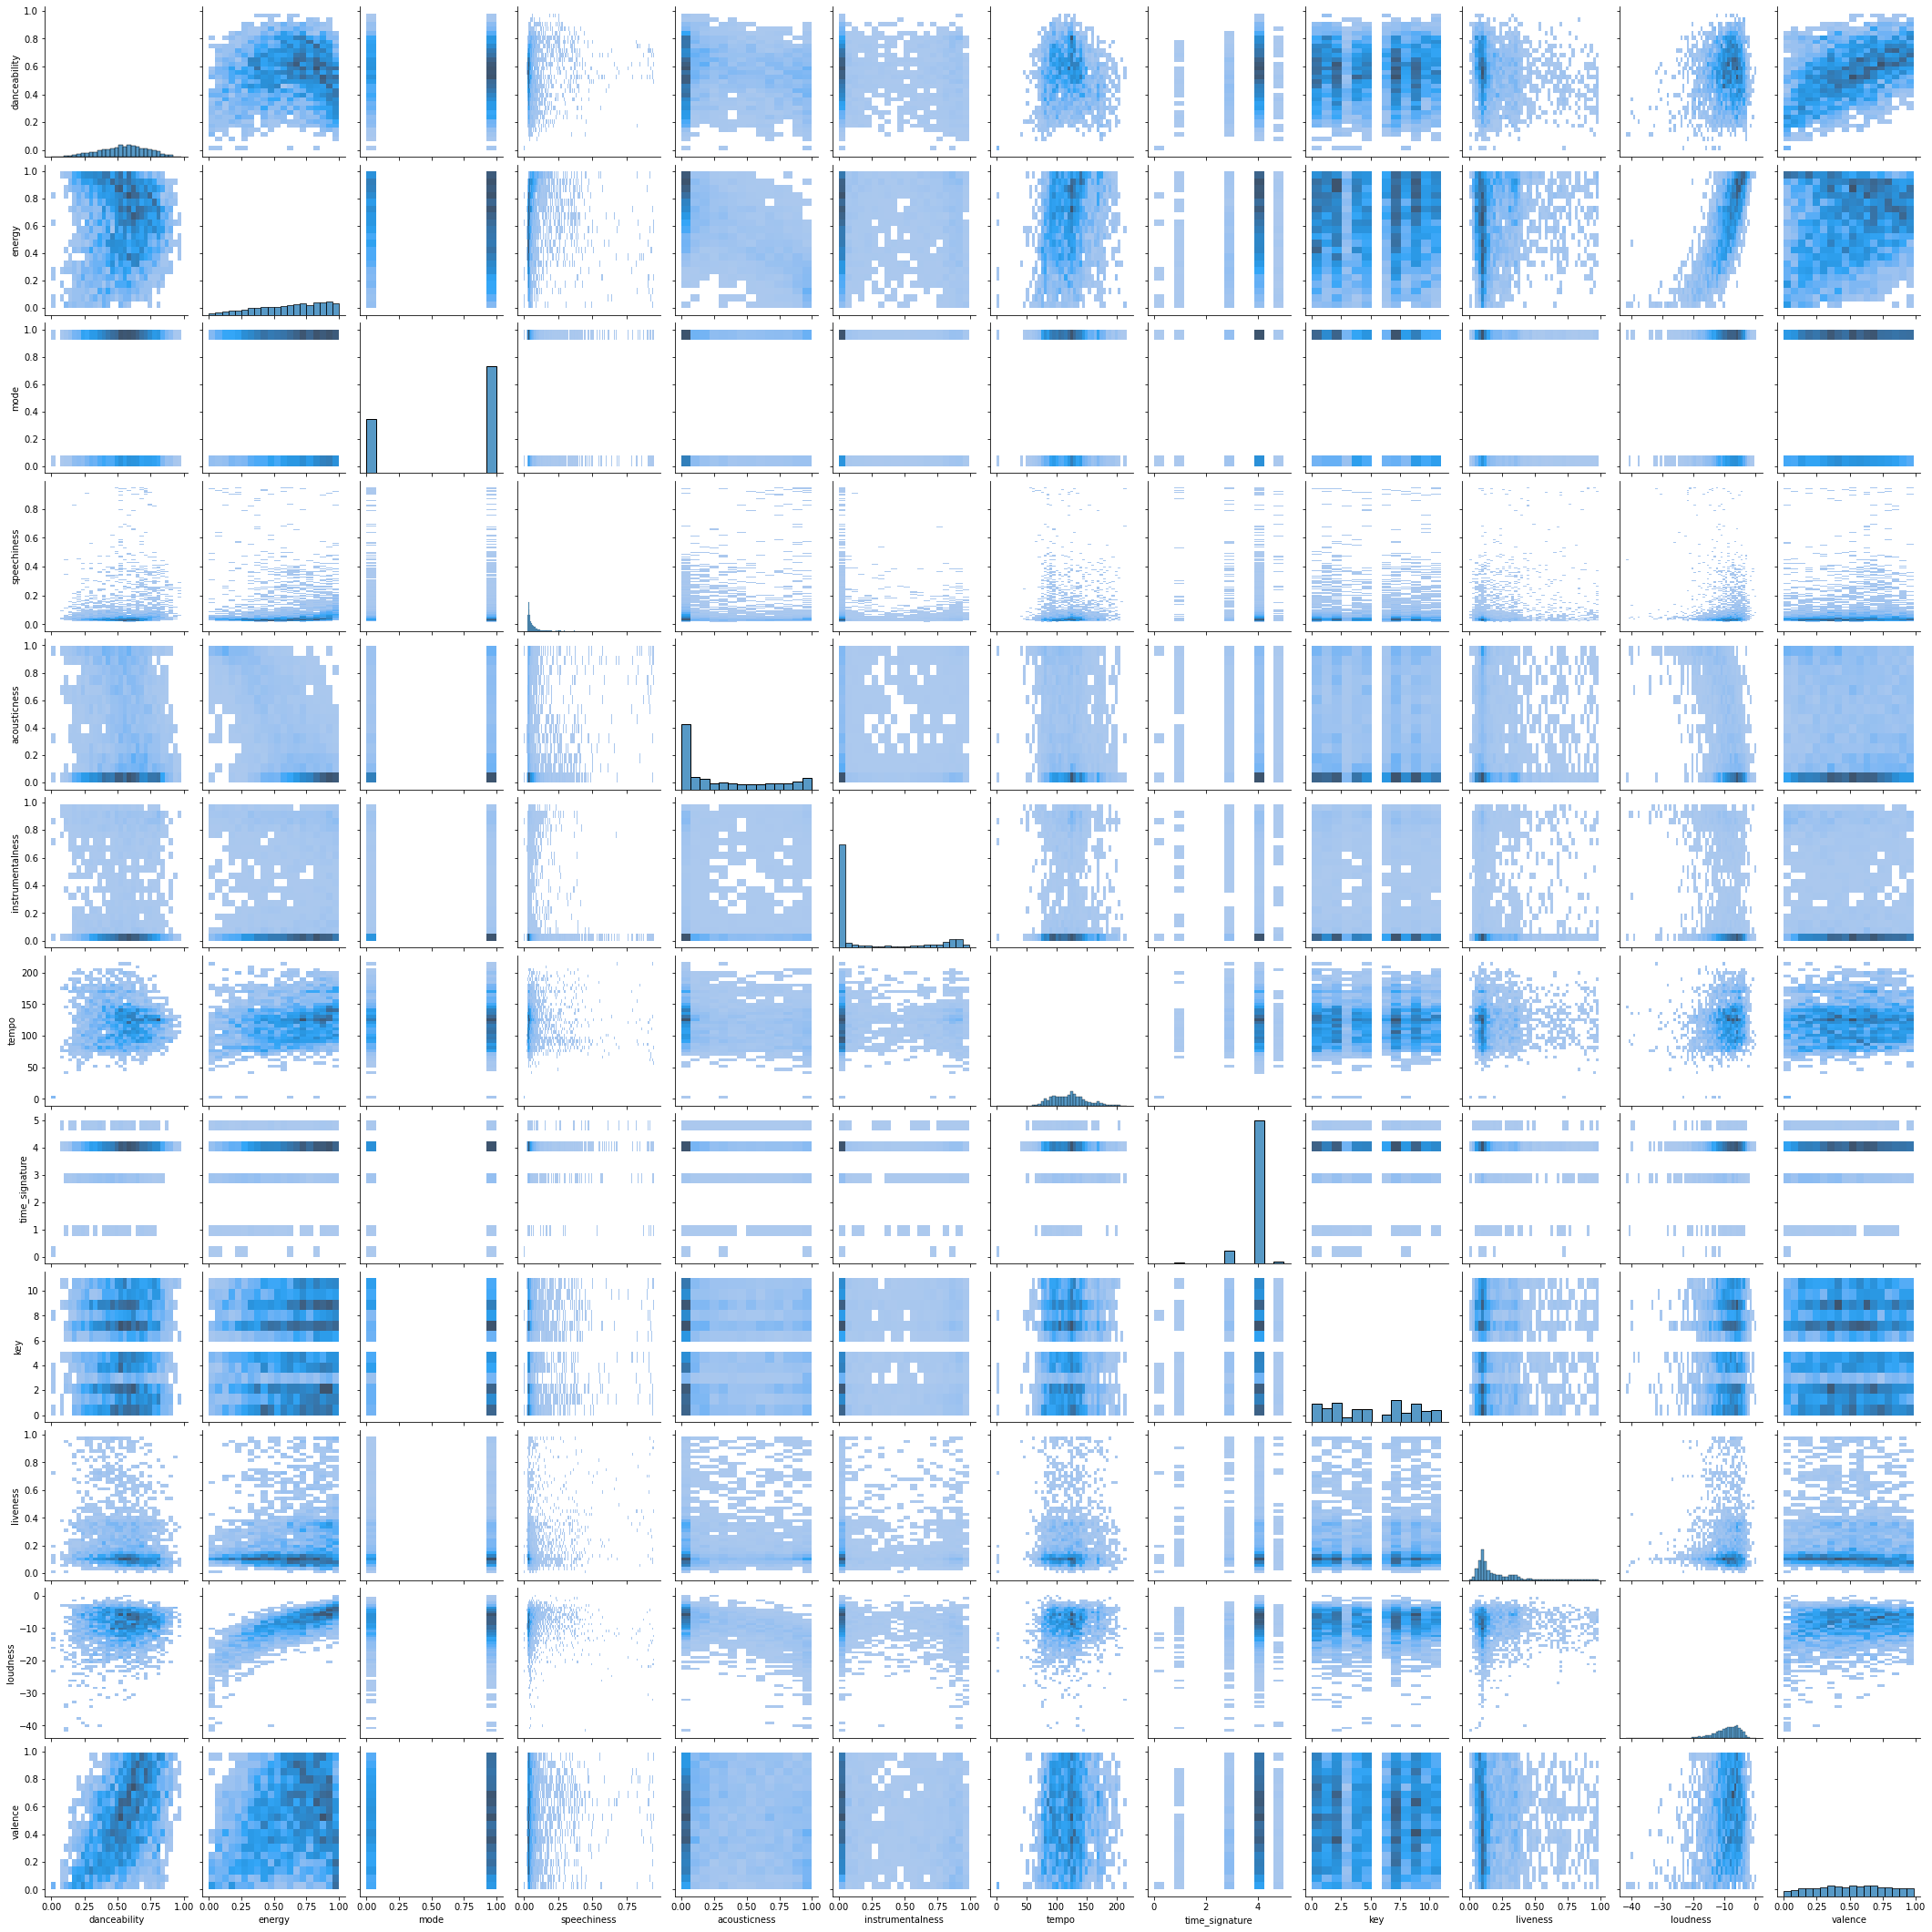

In [13]:
import seaborn as sns

sns.pairplot(all_songs[audio_features], kind="hist")
plt.show()

In [14]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = all_songs[audio_features]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "models/scaler.pickle"
with open(filename, "wb") as file: 
        pickle.dump(scaler,file)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

In [15]:
audio_features_final = audio_features.copy()
audio_features_final.remove('energy')
audio_features_final.remove('valence')
audio_features_final.remove('instrumentalness')
audio_features_final.remove('speechiness')
audio_features_final.remove('acousticness')

In [17]:
audio_features

['danceability',
 'energy',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'tempo',
 'time_signature',
 'key',
 'liveness',
 'loudness',
 'valence']

In [18]:
kmeans = KMeans(n_clusters=10, random_state=1234, verbose=1)
X_scaled_df=X_scaled_df[audio_features_final]
kmeans.fit(X_scaled_df)
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index() 

Initialization complete
Iteration 0, inertia 15780.734453600639.
Iteration 1, inertia 12500.613454786308.
Iteration 2, inertia 12167.52000761222.
Iteration 3, inertia 12000.173003464828.
Iteration 4, inertia 11880.341816662494.
Iteration 5, inertia 11791.930104294348.
Iteration 6, inertia 11730.512834688767.
Iteration 7, inertia 11685.60554178913.
Iteration 8, inertia 11658.014745851515.
Iteration 9, inertia 11643.919353883066.
Iteration 10, inertia 11636.70009643838.
Iteration 11, inertia 11632.378688913264.
Iteration 12, inertia 11630.052515053943.
Iteration 13, inertia 11626.810077857794.
Iteration 14, inertia 11623.512812320225.
Iteration 15, inertia 11620.106041647476.
Iteration 16, inertia 11617.47579709622.
Iteration 17, inertia 11612.515009533816.
Iteration 18, inertia 11601.505695373631.
Iteration 19, inertia 11589.034312605569.
Iteration 20, inertia 11574.635785251658.
Iteration 21, inertia 11565.84706037454.
Iteration 22, inertia 11559.64992689281.
Iteration 23, inertia 1155

Iteration 0, inertia 15030.082834010962.
Iteration 1, inertia 12353.940167519235.
Iteration 2, inertia 11751.137509928.
Iteration 3, inertia 11591.610773108667.
Iteration 4, inertia 11517.443795060866.
Iteration 5, inertia 11472.969082733835.
Iteration 6, inertia 11450.907882624077.
Iteration 7, inertia 11442.07276315815.
Iteration 8, inertia 11437.612952058307.
Iteration 9, inertia 11433.948875716984.
Iteration 10, inertia 11431.855349804866.
Iteration 11, inertia 11430.413150450711.
Iteration 12, inertia 11429.653343877115.
Iteration 13, inertia 11429.38520198859.
Iteration 14, inertia 11429.267004978628.
Iteration 15, inertia 11429.168676767176.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 16399.689388004124.
Iteration 1, inertia 12558.964029602035.
Iteration 2, inertia 12076.133163332164.
Iteration 3, inertia 11873.309164384978.
Iteration 4, inertia 11770.04580970692.
Iteration 5, inertia 11700.1864846427.
Iteration 6, inertia 11650.11

0    381
1    582
2    654
3    334
4    261
5     44
6    445
7    256
8    238
9    485
dtype: int64

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 29253.49446136762.
Iteration 1, inertia 23137.29626785635.
Iteration 2, inertia 23030.39679522028.
Iteration 3, inertia 22959.614421410533.
Iteration 4, inertia 22891.307994123465.
Iteration 5, inertia 22853.11416481826.
Iteration 6, inertia 22832.052457208112.
Iteration 7, inertia 22817.570911604736.
Iteration 8, inertia 22805.898858603916.
Iteration 9, inertia 22796.756539760856.
Iteration 10, inertia 22789.94719361366.
Iteration 11, inertia 22787.536438309977.
Iteration 12, inertia 22784.604483563067.
Iteration 13, inertia 22782.061599567798.
Iteration 14, inertia 22780.135230170665.
Iteration 15, inertia 22779.176305156005.
Iteration 16, inertia 22778.19744617498.
Iteration 17, inertia 22777.597053910155.
Iteration 18, inertia 22777.25655459444.
Converged at iteration 18: center shift 8.026197395032985e-05 within tolerance 0.0001000000000000015.
Initialization complete
Iteration 0, inertia 3628

Iteration 48, inertia 22808.037073002113.
Iteration 49, inertia 22802.456317644992.
Iteration 50, inertia 22796.87290602455.
Iteration 51, inertia 22792.1493797465.
Iteration 52, inertia 22788.739270697857.
Iteration 53, inertia 22784.861043216566.
Iteration 54, inertia 22782.349191726957.
Iteration 55, inertia 22779.957302759558.
Iteration 56, inertia 22777.364465327097.
Iteration 57, inertia 22775.161015668455.
Iteration 58, inertia 22773.49383951049.
Iteration 59, inertia 22771.883472725996.
Iteration 60, inertia 22770.802686638828.
Iteration 61, inertia 22770.077441730034.
Iteration 62, inertia 22769.66119942207.
Converged at iteration 62: center shift 4.7929194621391826e-05 within tolerance 0.0001000000000000015.
Initialization complete
Iteration 0, inertia 37671.975961826814.
Iteration 1, inertia 23107.66477575961.
Iteration 2, inertia 23087.082127387017.
Iteration 3, inertia 23076.612565696738.
Iteration 4, inertia 23070.79771948658.
Iteration 5, inertia 23064.658998077164.
Iter

Iteration 28, inertia 20468.69036602731.
Iteration 29, inertia 20466.99449010587.
Iteration 30, inertia 20465.607304483918.
Iteration 31, inertia 20464.97648486214.
Iteration 32, inertia 20464.261942162895.
Iteration 33, inertia 20463.404640783425.
Iteration 34, inertia 20463.025057799496.
Iteration 35, inertia 20462.37824977544.
Iteration 36, inertia 20462.025327724165.
Converged at iteration 36: center shift 8.317891511923677e-05 within tolerance 0.0001000000000000015.
Initialization complete
Iteration 0, inertia 25123.897240458195.
Iteration 1, inertia 20513.924517480293.
Iteration 2, inertia 20331.912404632654.
Iteration 3, inertia 20201.631945687215.
Iteration 4, inertia 20132.136155734705.
Iteration 5, inertia 20106.95271624247.
Iteration 6, inertia 20094.577830392693.
Iteration 7, inertia 20087.260940727003.
Iteration 8, inertia 20081.72265727975.
Iteration 9, inertia 20078.96103589735.
Iteration 10, inertia 20076.92381607389.
Iteration 11, inertia 20074.200373169188.
Iteration 

Iteration 9, inertia 18504.32196274881.
Iteration 10, inertia 18380.347102659165.
Iteration 11, inertia 18262.967104659227.
Iteration 12, inertia 18186.92760163884.
Iteration 13, inertia 18128.037154854228.
Iteration 14, inertia 18062.268502207295.
Iteration 15, inertia 17990.214719513537.
Iteration 16, inertia 17934.14048187118.
Iteration 17, inertia 17897.822934311713.
Iteration 18, inertia 17860.86377872477.
Iteration 19, inertia 17826.885283355994.
Iteration 20, inertia 17803.395936200624.
Iteration 21, inertia 17777.47223249582.
Iteration 22, inertia 17750.753223411273.
Iteration 23, inertia 17723.502150150733.
Iteration 24, inertia 17700.17641740031.
Iteration 25, inertia 17675.614176075658.
Iteration 26, inertia 17633.1043054407.
Iteration 27, inertia 17589.6747415802.
Iteration 28, inertia 17558.929301970493.
Iteration 29, inertia 17535.69738789822.
Iteration 30, inertia 17514.166075459834.
Iteration 31, inertia 17489.819141181768.
Iteration 32, inertia 17469.853559592273.
Iter

Iteration 3, inertia 16078.733939243582.
Iteration 4, inertia 16054.68004412108.
Iteration 5, inertia 16036.580211107483.
Iteration 6, inertia 16021.255663504451.
Iteration 7, inertia 16006.940128814518.
Iteration 8, inertia 15998.42219753774.
Iteration 9, inertia 15993.386638765904.
Iteration 10, inertia 15991.490787061026.
Iteration 11, inertia 15990.616848512927.
Iteration 12, inertia 15989.747411746614.
Iteration 13, inertia 15989.173843750663.
Converged at iteration 13: center shift 9.159662956802112e-05 within tolerance 0.0001000000000000015.
Initialization complete
Iteration 0, inertia 22443.498146372436.
Iteration 1, inertia 17711.9514354547.
Iteration 2, inertia 17286.582877845714.
Iteration 3, inertia 16994.75736548155.
Iteration 4, inertia 16761.639527121144.
Iteration 5, inertia 16635.002441250308.
Iteration 6, inertia 16566.602246613977.
Iteration 7, inertia 16544.034027925918.
Iteration 8, inertia 16535.69765079441.
Iteration 9, inertia 16533.081460194124.
Iteration 10, i

Iteration 0, inertia 19302.024463338515.
Iteration 1, inertia 16146.245490089075.
Iteration 2, inertia 15605.667725440358.
Iteration 3, inertia 15393.499038514288.
Iteration 4, inertia 15192.519735129035.
Iteration 5, inertia 15025.72134146621.
Iteration 6, inertia 14924.958887751705.
Iteration 7, inertia 14823.852849840036.
Iteration 8, inertia 14718.992919371309.
Iteration 9, inertia 14642.535282597692.
Iteration 10, inertia 14577.551066451348.
Iteration 11, inertia 14539.309707389993.
Iteration 12, inertia 14528.928998121673.
Iteration 13, inertia 14527.566956142351.
Iteration 14, inertia 14527.361662941736.
Converged at iteration 14: center shift 9.454277303794737e-05 within tolerance 0.0001000000000000015.
Initialization complete
Iteration 0, inertia 19425.060213316963.
Iteration 1, inertia 15696.154533693527.
Iteration 2, inertia 14985.759395264467.
Iteration 3, inertia 14757.597641384476.
Iteration 4, inertia 14667.024720254298.
Iteration 5, inertia 14643.250119171727.
Iteration

Iteration 5, inertia 14005.644594836976.
Iteration 6, inertia 13988.462852671155.
Iteration 7, inertia 13977.643834180493.
Iteration 8, inertia 13971.825831361315.
Iteration 9, inertia 13967.407681271425.
Iteration 10, inertia 13962.983357758978.
Iteration 11, inertia 13960.6271193508.
Iteration 12, inertia 13959.562521632903.
Iteration 13, inertia 13959.034139633897.
Iteration 14, inertia 13958.612649690007.
Iteration 15, inertia 13958.43871888105.
Iteration 16, inertia 13958.390731517497.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 19387.482072142164.
Iteration 1, inertia 15401.826626517814.
Iteration 2, inertia 14652.211745176253.
Iteration 3, inertia 14289.256133575405.
Iteration 4, inertia 14113.476944146432.
Iteration 5, inertia 14032.966031457012.
Iteration 6, inertia 13993.234026985949.
Iteration 7, inertia 13958.770116537715.
Iteration 8, inertia 13919.588334945398.
Iteration 9, inertia 13860.299953360016.
Iteration 10, inertia 1

Iteration 23, inertia 12963.247539357262.
Iteration 24, inertia 12963.12572177213.
Iteration 25, inertia 12962.967770428619.
Iteration 26, inertia 12962.884043161199.
Converged at iteration 26: center shift 1.61285934910267e-05 within tolerance 0.0001000000000000015.
Initialization complete
Iteration 0, inertia 17217.380012696427.
Iteration 1, inertia 13792.598617682701.
Iteration 2, inertia 13294.258203366078.
Iteration 3, inertia 13188.024042454486.
Iteration 4, inertia 13162.90786068844.
Iteration 5, inertia 13149.727155353965.
Iteration 6, inertia 13143.413543020277.
Iteration 7, inertia 13139.872687332385.
Iteration 8, inertia 13138.178168588664.
Iteration 9, inertia 13136.805777867183.
Iteration 10, inertia 13136.181310237824.
Iteration 11, inertia 13135.789054399766.
Iteration 12, inertia 13135.447584169511.
Iteration 13, inertia 13134.169751386826.
Iteration 14, inertia 13131.404261341217.
Iteration 15, inertia 13128.961286106822.
Iteration 16, inertia 13126.696130599948.
Itera

Iteration 9, inertia 12360.123196632308.
Iteration 10, inertia 12341.638255485635.
Iteration 11, inertia 12322.870533868496.
Iteration 12, inertia 12303.39825348614.
Iteration 13, inertia 12278.090835969746.
Iteration 14, inertia 12245.724021138365.
Iteration 15, inertia 12191.852790631236.
Iteration 16, inertia 12110.986034971951.
Iteration 17, inertia 12021.271981121565.
Iteration 18, inertia 11987.061325692255.
Iteration 19, inertia 11981.449699455728.
Iteration 20, inertia 11980.00312311581.
Iteration 21, inertia 11979.421575581397.
Iteration 22, inertia 11979.078304503762.
Iteration 23, inertia 11978.823102189279.
Iteration 24, inertia 11978.110981292368.
Iteration 25, inertia 11977.371019820532.
Iteration 26, inertia 11976.874348886604.
Iteration 27, inertia 11976.46069729764.
Iteration 28, inertia 11976.233088975392.
Iteration 29, inertia 11976.027040951029.
Iteration 30, inertia 11975.935253879661.
Converged at iteration 30: strict convergence.
Initialization complete
Iteration

Iteration 4, inertia 11800.649554958012.
Iteration 5, inertia 11775.41733567526.
Iteration 6, inertia 11762.384006827415.
Iteration 7, inertia 11751.380768372008.
Iteration 8, inertia 11731.811762487629.
Iteration 9, inertia 11713.62726936754.
Iteration 10, inertia 11703.613987734037.
Iteration 11, inertia 11696.40091456489.
Iteration 12, inertia 11691.239712899553.
Iteration 13, inertia 11688.90009205004.
Iteration 14, inertia 11687.212354418185.
Iteration 15, inertia 11684.71659488758.
Iteration 16, inertia 11682.288919800736.
Iteration 17, inertia 11679.818759007507.
Iteration 18, inertia 11676.726683457488.
Iteration 19, inertia 11670.724127927173.
Iteration 20, inertia 11665.278395275194.
Iteration 21, inertia 11661.51029082245.
Iteration 22, inertia 11658.463217364728.
Iteration 23, inertia 11653.890473534013.
Iteration 24, inertia 11650.503090811406.
Iteration 25, inertia 11645.757898517177.
Iteration 26, inertia 11638.188047654518.
Iteration 27, inertia 11631.58582915026.
Itera

Iteration 1, inertia 13241.439950314405.
Iteration 2, inertia 12611.940320917718.
Iteration 3, inertia 12170.350813914101.
Iteration 4, inertia 11842.21662834632.
Iteration 5, inertia 11703.217227729983.
Iteration 6, inertia 11614.118492949283.
Iteration 7, inertia 11553.95525452128.
Iteration 8, inertia 11497.085943693093.
Iteration 9, inertia 11443.799581957124.
Iteration 10, inertia 11375.268809994555.
Iteration 11, inertia 11315.737543827763.
Iteration 12, inertia 11276.447034195971.
Iteration 13, inertia 11260.116094744251.
Iteration 14, inertia 11252.628857415071.
Iteration 15, inertia 11247.862436424628.
Iteration 16, inertia 11245.64925004492.
Iteration 17, inertia 11242.729093874226.
Iteration 18, inertia 11239.380034956055.
Iteration 19, inertia 11234.417909687922.
Iteration 20, inertia 11230.822009443886.
Iteration 21, inertia 11228.610143379214.
Iteration 22, inertia 11226.65583217622.
Iteration 23, inertia 11223.963675643412.
Iteration 24, inertia 11220.86015612006.
Iterat

Iteration 0, inertia 15608.364203601916.
Iteration 1, inertia 12203.31373970394.
Iteration 2, inertia 11488.759749956042.
Iteration 3, inertia 11200.74662933394.
Iteration 4, inertia 11090.21365526075.
Iteration 5, inertia 11029.45019720151.
Iteration 6, inertia 10978.676421728258.
Iteration 7, inertia 10936.67707219825.
Iteration 8, inertia 10887.87950192229.
Iteration 9, inertia 10841.070986060247.
Iteration 10, inertia 10802.855838615644.
Iteration 11, inertia 10779.65726339495.
Iteration 12, inertia 10769.657598275562.
Iteration 13, inertia 10763.965243068278.
Iteration 14, inertia 10759.106203245736.
Iteration 15, inertia 10756.28811571339.
Iteration 16, inertia 10754.90349130465.
Iteration 17, inertia 10754.350650877182.
Iteration 18, inertia 10753.948114861234.
Iteration 19, inertia 10753.66058697752.
Iteration 20, inertia 10753.493078531916.
Iteration 21, inertia 10753.382655811967.
Converged at iteration 21: center shift 5.767660110195137e-05 within tolerance 0.000100000000000

Training a K-Means model with 13 clusters! 

Initialization complete
Iteration 0, inertia 14102.066872693422.
Iteration 1, inertia 11292.705185707171.
Iteration 2, inertia 10958.035903944707.
Iteration 3, inertia 10749.909053210362.
Iteration 4, inertia 10644.32636232268.
Iteration 5, inertia 10589.493931769632.
Iteration 6, inertia 10541.924389610129.
Iteration 7, inertia 10499.33049242805.
Iteration 8, inertia 10452.042170449582.
Iteration 9, inertia 10417.270147232055.
Iteration 10, inertia 10387.889823901423.
Iteration 11, inertia 10366.680641788209.
Iteration 12, inertia 10353.738485394431.
Iteration 13, inertia 10343.840577296918.
Iteration 14, inertia 10336.819523638773.
Iteration 15, inertia 10333.738431294096.
Iteration 16, inertia 10332.001780788418.
Iteration 17, inertia 10331.399422830493.
Iteration 18, inertia 10330.74809288459.
Iteration 19, inertia 10330.099717940788.
Iteration 20, inertia 10330.032073996617.
Converged at iteration 20: center shift 9.69918079178682e-05 w

Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 13615.93906275505.
Iteration 1, inertia 11065.442850078145.
Iteration 2, inertia 10638.691432335389.
Iteration 3, inertia 10454.95094152289.
Iteration 4, inertia 10353.177947288921.
Iteration 5, inertia 10299.19580108131.
Iteration 6, inertia 10261.209558546972.
Iteration 7, inertia 10225.875131887615.
Iteration 8, inertia 10186.644136563844.
Iteration 9, inertia 10156.568094571105.
Iteration 10, inertia 10126.092451387947.
Iteration 11, inertia 10097.463493384103.
Iteration 12, inertia 10086.06124256429.
Iteration 13, inertia 10077.101850404399.
Iteration 14, inertia 10071.14030788063.
Iteration 15, inertia 10068.358227264056.
Iteration 16, inertia 10066.903807093378.
Iteration 17, inertia 10065.712029857685.
Iteration 18, inertia 10064.893310881127.
Iteration 19, inertia 10064.15310824218.
Iteration 20, inertia 10063.510965612215.
Iteration 21, inertia 10062.75707970939.
Iteration 22, inertia 10

Initialization complete
Iteration 0, inertia 13161.687435442253.
Iteration 1, inertia 11297.941988031218.
Iteration 2, inertia 10959.278754998411.
Iteration 3, inertia 10725.224917115229.
Iteration 4, inertia 10588.306118266635.
Iteration 5, inertia 10500.886246958238.
Iteration 6, inertia 10440.013775332924.
Iteration 7, inertia 10408.622480880373.
Iteration 8, inertia 10394.401393677084.
Iteration 9, inertia 10387.086314782568.
Iteration 10, inertia 10381.861172524363.
Iteration 11, inertia 10377.39650658238.
Iteration 12, inertia 10372.917736197807.
Iteration 13, inertia 10369.837095026283.
Iteration 14, inertia 10367.03182769016.
Iteration 15, inertia 10364.849041238227.
Iteration 16, inertia 10362.19283904547.
Iteration 17, inertia 10361.223833918375.
Iteration 18, inertia 10360.811203041832.
Iteration 19, inertia 10360.352411613116.
Iteration 20, inertia 10359.718859725468.
Iteration 21, inertia 10359.092426701467.
Iteration 22, inertia 10358.124408726755.
Iteration 23, inertia 1

Iteration 18, inertia 9943.593939605564.
Iteration 19, inertia 9939.92895728724.
Iteration 20, inertia 9934.278974787996.
Iteration 21, inertia 9931.775008635093.
Iteration 22, inertia 9931.265370312492.
Iteration 23, inertia 9930.826228357242.
Iteration 24, inertia 9929.364282344231.
Iteration 25, inertia 9927.596488546767.
Iteration 26, inertia 9922.152490701172.
Iteration 27, inertia 9919.396549430243.
Iteration 28, inertia 9917.581125910834.
Iteration 29, inertia 9915.996047832268.
Iteration 30, inertia 9914.255419861962.
Iteration 31, inertia 9911.535170285322.
Iteration 32, inertia 9908.120499875435.
Iteration 33, inertia 9906.259249168894.
Iteration 34, inertia 9904.809813789345.
Iteration 35, inertia 9904.595662040178.
Iteration 36, inertia 9904.33234084327.
Iteration 37, inertia 9904.140939247758.
Iteration 38, inertia 9904.021003872855.
Iteration 39, inertia 9903.954867813976.
Iteration 40, inertia 9903.907035444096.
Converged at iteration 40: strict convergence.
Initializati

Iteration 42, inertia 9545.223068736716.
Iteration 43, inertia 9543.570510936264.
Iteration 44, inertia 9542.15816190938.
Iteration 45, inertia 9541.37493571857.
Iteration 46, inertia 9540.44409537801.
Iteration 47, inertia 9539.123574025847.
Iteration 48, inertia 9536.298792115775.
Iteration 49, inertia 9532.246509690909.
Iteration 50, inertia 9528.59292038505.
Iteration 51, inertia 9525.936636106986.
Iteration 52, inertia 9523.76191821963.
Iteration 53, inertia 9522.291925328409.
Iteration 54, inertia 9520.97329203299.
Iteration 55, inertia 9519.601539463452.
Iteration 56, inertia 9518.892965111825.
Iteration 57, inertia 9518.484766324202.
Iteration 58, inertia 9518.399519490813.
Converged at iteration 58: center shift 3.0241610304133427e-05 within tolerance 0.0001000000000000015.
Initialization complete
Iteration 0, inertia 12836.567877225943.
Iteration 1, inertia 10622.132294018582.
Iteration 2, inertia 10133.078656270052.
Iteration 3, inertia 9940.899958449663.
Iteration 4, inerti

Training a K-Means model with 17 clusters! 

Initialization complete
Iteration 0, inertia 12825.417168424585.
Iteration 1, inertia 10301.665859463941.
Iteration 2, inertia 9860.105243398863.
Iteration 3, inertia 9673.643361671418.
Iteration 4, inertia 9588.855830402705.
Iteration 5, inertia 9553.146790146388.
Iteration 6, inertia 9520.038622718506.
Iteration 7, inertia 9486.88676291082.
Iteration 8, inertia 9471.160242140495.
Iteration 9, inertia 9461.25183021289.
Iteration 10, inertia 9452.993738274792.
Iteration 11, inertia 9447.11343218723.
Iteration 12, inertia 9443.475416225177.
Iteration 13, inertia 9440.754432462094.
Iteration 14, inertia 9436.751849508652.
Iteration 15, inertia 9433.104602407615.
Iteration 16, inertia 9428.992496741168.
Iteration 17, inertia 9423.529666445236.
Iteration 18, inertia 9417.086348721989.
Iteration 19, inertia 9412.38904804185.
Iteration 20, inertia 9408.975318941888.
Iteration 21, inertia 9406.685399650312.
Iteration 22, inertia 9405.478977009749.


Training a K-Means model with 18 clusters! 

Initialization complete
Iteration 0, inertia 12400.016246510391.
Iteration 1, inertia 10113.704938144292.
Iteration 2, inertia 9680.322073760526.
Iteration 3, inertia 9510.519390693787.
Iteration 4, inertia 9429.099371983631.
Iteration 5, inertia 9389.261944712807.
Iteration 6, inertia 9360.013346592801.
Iteration 7, inertia 9327.810782232607.
Iteration 8, inertia 9310.832616449301.
Iteration 9, inertia 9299.758361859673.
Iteration 10, inertia 9293.758675500732.
Iteration 11, inertia 9290.494027590245.
Iteration 12, inertia 9284.58575788595.
Iteration 13, inertia 9277.056481218135.
Iteration 14, inertia 9271.60531500808.
Iteration 15, inertia 9265.963312709748.
Iteration 16, inertia 9259.290430458082.
Iteration 17, inertia 9251.351325993246.
Iteration 18, inertia 9243.89743827145.
Iteration 19, inertia 9239.305828804845.
Iteration 20, inertia 9235.191596769411.
Iteration 21, inertia 9228.922314038879.
Iteration 22, inertia 9223.430248852825.

Iteration 1, inertia 10295.846321794479.
Iteration 2, inertia 9663.631130626498.
Iteration 3, inertia 9494.092661447374.
Iteration 4, inertia 9435.817612073844.
Iteration 5, inertia 9405.816071074067.
Iteration 6, inertia 9384.950124796127.
Iteration 7, inertia 9373.616100005542.
Iteration 8, inertia 9363.384422560152.
Iteration 9, inertia 9351.058508727074.
Iteration 10, inertia 9339.274884744693.
Iteration 11, inertia 9333.764688186358.
Iteration 12, inertia 9330.175614812688.
Iteration 13, inertia 9327.303827455235.
Iteration 14, inertia 9325.76144784054.
Iteration 15, inertia 9324.563283212854.
Iteration 16, inertia 9323.160289629515.
Iteration 17, inertia 9321.800983215171.
Iteration 18, inertia 9320.23946730017.
Iteration 19, inertia 9318.804690635245.
Iteration 20, inertia 9316.985456741639.
Iteration 21, inertia 9315.785639331862.
Iteration 22, inertia 9313.379229209995.
Iteration 23, inertia 9309.286961978325.
Iteration 24, inertia 9303.532093383701.
Iteration 25, inertia 9293

Initialization complete
Iteration 0, inertia 12151.589246448631.
Iteration 1, inertia 9766.2055668278.
Iteration 2, inertia 9431.292904616526.
Iteration 3, inertia 9319.827559872174.
Iteration 4, inertia 9277.485970005608.
Iteration 5, inertia 9249.336115517366.
Iteration 6, inertia 9230.393429310217.
Iteration 7, inertia 9213.399064064484.
Iteration 8, inertia 9203.67403686708.
Iteration 9, inertia 9189.580583564912.
Iteration 10, inertia 9172.466239374218.
Iteration 11, inertia 9162.389670561313.
Iteration 12, inertia 9150.357779607513.
Iteration 13, inertia 9135.799694370615.
Iteration 14, inertia 9096.59257171256.
Iteration 15, inertia 9058.827358265937.
Iteration 16, inertia 9047.656001595904.
Iteration 17, inertia 9042.691312964778.
Iteration 18, inertia 9040.7055678626.
Iteration 19, inertia 9039.811456013053.
Iteration 20, inertia 9039.39825032141.
Iteration 21, inertia 9038.703595307063.
Iteration 22, inertia 9037.685832093568.
Iteration 23, inertia 9037.023191708282.
Iteratio

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

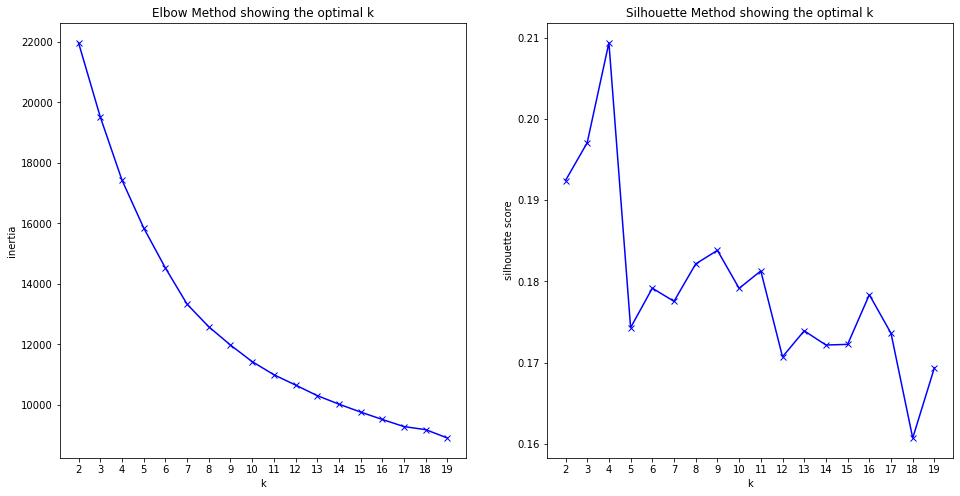

In [19]:
K = range(2, 20)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    filename = "models/kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [21]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [22]:
#scaler     = load("models/scaler.pickle")
best_model = load("models/kmeans_12.pickle")
best_model

KMeans(n_clusters=12, random_state=1234, verbose=1)

In [23]:
clusters = best_model.predict(X_scaled_df)

In [24]:
all_songs['cluster'] = clusters
all_songs['cluster'].value_counts()

5     549
1     499
7     387
2     379
3     327
0     313
4     261
11    252
9     231
8     226
10    212
6      44
Name: cluster, dtype: int64

In [27]:
all_songs.tail()

,song,singer,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,hot,cluster
3675,Hold Me Darling,Tony Curtis,3AdemeJ7NFWl3vgQokE5hi,0.736,0.394,5.0,-11.066,1.0,0.0587,0.050600,...,154.155,audio_features,3AdemeJ7NFWl3vgQokE5hi,spotify:track:3AdemeJ7NFWl3vgQokE5hi,https://api.spotify.com/v1/tracks/3AdemeJ7NFWl...,https://api.spotify.com/v1/audio-analysis/3Ade...,206920.0,4.0,False,5
3676,Peace And Love,The Itals,2ArsnzjMQj1S7sOwEGkbVC,0.744,0.372,0.0,-16.438,1.0,0.0765,0.205000,...,79.019,audio_features,2ArsnzjMQj1S7sOwEGkbVC,spotify:track:2ArsnzjMQj1S7sOwEGkbVC,https://api.spotify.com/v1/tracks/2ArsnzjMQj1S...,https://api.spotify.com/v1/audio-analysis/2Ars...,235040.0,4.0,False,1
3677,Makin' Plans,Miranda Lambert,4SgbELGcdmMdVtSbpkSG6x,0.441,0.463,10.0,-8.041,1.0,0.0283,0.069700,...,79.611,audio_features,4SgbELGcdmMdVtSbpkSG6x,spotify:track:4SgbELGcdmMdVtSbpkSG6x,https://api.spotify.com/v1/tracks/4SgbELGcdmMd...,https://api.spotify.com/v1/audio-analysis/4Sgb...,230000.0,3.0,False,8
3678,Beneath The Green,Vision of Disorder,2mkiebZRKDqJmOX0lFj3Vx,0.398,0.976,7.0,-4.318,1.0,0.2360,0.011600,...,112.855,audio_features,2mkiebZRKDqJmOX0lFj3Vx,spotify:track:2mkiebZRKDqJmOX0lFj3Vx,https://api.spotify.com/v1/tracks/2mkiebZRKDqJ...,https://api.spotify.com/v1/audio-analysis/2mki...,247640.0,4.0,False,0
3679,Southern Cross,Weedeater,04Uv8xBOmgG12CC5fSBm35,0.271,0.953,10.0,-4.977,0.0,0.0575,0.000003,...,81.414,audio_features,04Uv8xBOmgG12CC5fSBm35,spotify:track:04Uv8xBOmgG12CC5fSBm35,https://api.spotify.com/v1/tracks/04Uv8xBOmgG1...,https://api.spotify.com/v1/audio-analysis/04Uv...,271627.0,4.0,False,2


In [48]:
summary = all_songs.groupby(['cluster']).mean()
summary[audio_features].style.background_gradient(axis=0)  

,danceability,energy,mode,speechiness,acousticness,instrumentalness,tempo,time_signature,key,liveness,loudness,valence
cluster,,,,,,,,,,,,
0,0.357288,0.641014,0.926518,0.073168,0.310774,0.240943,93.773744,4.019169,4.734824,0.200319,-8.569454,0.352281
1,0.673635,0.632515,1.000000,0.078470,0.286267,0.184715,112.470701,4.002004,1.372745,0.154028,-8.846034,0.619783
2,0.655158,0.675029,0.000000,0.105537,0.219628,0.251216,110.071296,4.010554,9.203166,0.174353,-8.338588,0.561864
3,0.461000,0.738117,1.000000,0.072325,0.212802,0.179114,150.894162,4.006116,7.990826,0.188512,-7.346492,0.527466
4,0.459674,0.711790,0.992337,0.086072,0.210100,0.161644,156.814935,3.992337,1.448276,0.188970,-7.822686,0.515374
5,0.678798,0.613083,1.000000,0.073290,0.333405,0.197989,111.494687,4.010929,7.865209,0.143259,-9.059377,0.616447
6,0.397591,0.438024,0.590909,0.162745,0.554266,0.214174,91.976955,0.863636,5.045455,0.284966,-13.196386,0.357014
7,0.633186,0.649977,0.000000,0.080404,0.235497,0.225527,118.189530,3.997416,2.767442,0.162927,-8.824204,0.535768
8,0.437373,0.417571,0.734513,0.086796,0.546819,0.198022,122.511310,3.000000,5.898230,0.167934,-11.770695,0.365193
